In [184]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.cluster import DBSCAN

In [185]:
df=pd.read_csv('scaled_data.csv')

In [186]:
df

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


In [187]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [188]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857


In [189]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases'],
      dtype='object')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2236 non-null   float64
 1   Marital_Status             2236 non-null   float64
 2   Income                     2236 non-null   float64
 3   Kidhome                    2236 non-null   float64
 4   Teenhome                   2236 non-null   float64
 5   Recency                    2236 non-null   float64
 6   MntWines                   2236 non-null   float64
 7   MntFruits                  2236 non-null   float64
 8   MntMeatProducts            2236 non-null   float64
 9   MntFishProducts            2236 non-null   float64
 10  MntSweetProducts           2236 non-null   float64
 11  MntGoldProds               2236 non-null   float64
 12  NumDealsPurchases          2236 non-null   float64
 13  NumWebPurchases            2236 non-null   float

In [191]:
df.shape

(2236, 29)

## Dimension Reductionality

In [192]:
pca=PCA()

In [193]:
pca.fit(df)

PCA()

In [194]:
(pca.explained_variance_ratio_).cumsum()*100

array([ 30.39622243,  39.59505166,  48.10199239,  53.12464104,
        57.03673847,  60.90148152,  64.47225184,  67.95344141,
        71.37723133,  74.65054023,  77.4294795 ,  80.09390238,
        82.50593483,  84.63876774,  86.74731614,  88.72255695,
        90.50674774,  92.13046797,  93.67012469,  95.17856597,
        96.49272212,  97.68735346,  98.58488332,  99.38264612,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

Taking n_components as 12 because we can cover 80% of the data.

In [195]:
pca = PCA(n_components=12, random_state=42)

In [196]:
pca.fit(df)

PCA(n_components=12, random_state=42)

In [197]:
pca_df= pd.DataFrame(pca.transform(df))

In [198]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.350201,-0.736941,-0.995048,2.267260,0.822102,0.122471,-1.797852,-0.101577,-0.264118,-0.218586,-0.610586,-0.321235
1,-3.012965,-0.221387,0.295453,-0.907452,1.016507,1.846077,-1.023929,0.504301,-0.873574,-0.328742,0.185846,0.130560
2,1.932750,-0.772437,-1.377870,-0.233072,0.273937,-0.806330,0.084117,0.370538,0.275929,1.757354,-0.256325,-0.217724
3,-2.843499,1.046119,-0.816270,0.444337,-0.901317,-0.344420,0.064064,0.934137,-0.273343,1.141146,-0.041514,0.415298
4,-0.434741,-0.676470,-0.457006,0.615745,-2.179768,-0.705192,0.414749,-0.332764,0.071527,-0.981312,0.088613,0.429779
...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2.461477,-2.051202,-0.203649,0.849126,-0.303749,0.493520,0.016093,-0.837298,-0.046875,1.840878,0.268887,-1.690961
2232,-0.951169,-1.503619,4.197275,0.178130,-1.375891,1.382735,1.519800,1.145286,-1.033396,-1.666879,-0.874076,-1.610243
2233,2.298818,1.112451,0.475870,-1.550903,-1.240579,-1.772947,-2.626413,-0.762795,0.404945,-0.040918,-0.637490,0.710385
2234,1.832451,-1.937730,-0.224466,-0.746499,1.318552,-0.256972,1.287236,0.719100,0.000329,0.441280,0.444791,0.085500


## K-means

In [199]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)

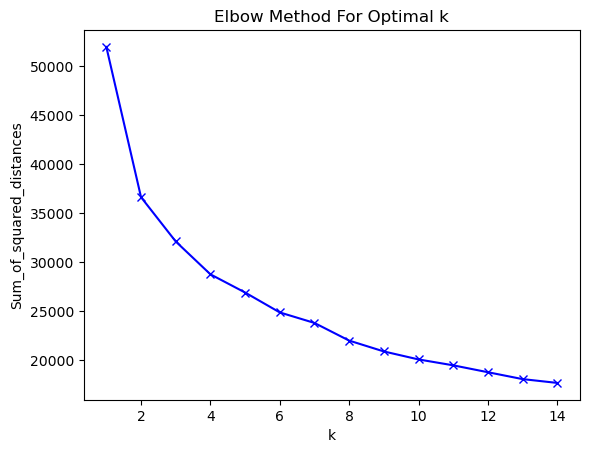

In [200]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [201]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Clusters'] = kmeans.fit_predict(pca_df)

<AxesSubplot:>

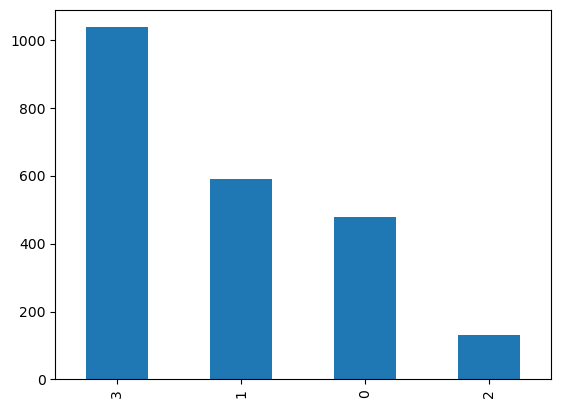

In [202]:
df.Clusters.value_counts().plot(kind='bar')

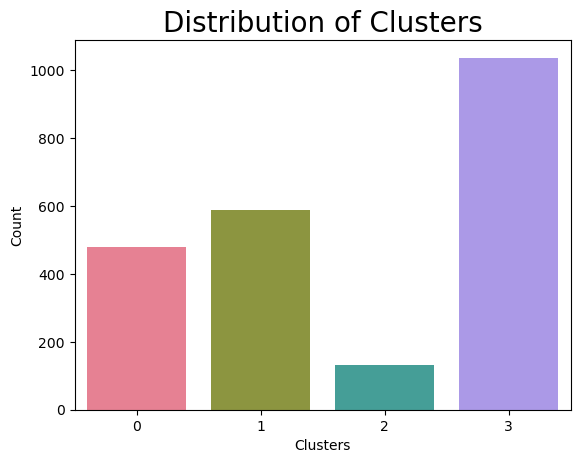

In [203]:
sns.countplot(x=df.Clusters,palette='husl')
plt.title('Distribution of Clusters', fontsize=20)
plt.ylabel('Count')
plt.savefig('Clusters.png')
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='Income'>

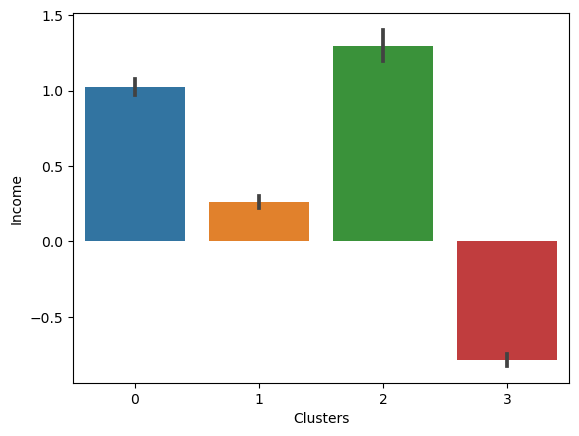

In [204]:
sns.barplot(x=df.Clusters,y=df.Income)

<AxesSubplot:xlabel='total_spent', ylabel='Income'>

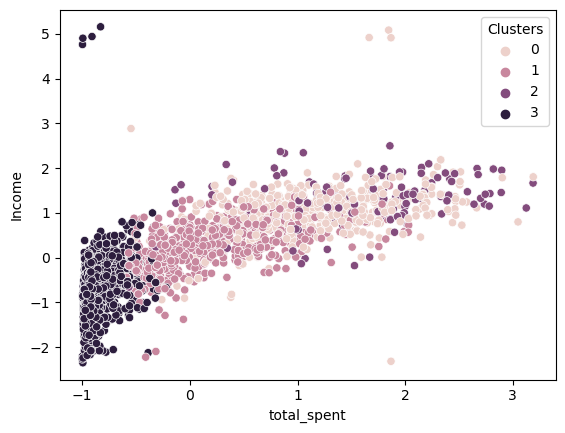

In [205]:
sns.scatterplot(x=df.total_spent, y=df.Income, hue=df.Clusters, data=df)

<AxesSubplot:xlabel='total_accepted_coupons', ylabel='count'>

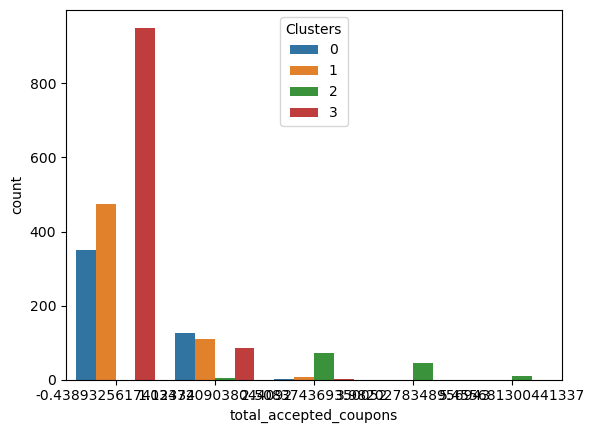

In [206]:
sns.countplot(x=df.total_accepted_coupons, hue=df.Clusters, data=df)

In [284]:
data= pd.read_csv('not_scaled_data.csv')

In [285]:
data

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,0,Graduate,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,66,1617,0,0,25
1,1,Graduate,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,69,27,2,0,6
2,2,Graduate,In Relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,58,776,0,0,21
3,3,Graduate,In Relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,39,53,1,0,8
4,4,Post Graduate,In Relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,42,422,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2235,Graduate,In Relationship,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,56,1341,1,0,18
2232,2236,Post Graduate,In Relationship,64014.0,2,1,56,406,0,30,...,0,1,0,0,0,77,444,3,1,22
2233,2237,Graduate,Single,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,42,1241,0,1,19
2234,2238,Post Graduate,In Relationship,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,67,843,1,0,23


In [286]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [287]:
data.isnull().sum()

Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
Age                          0
total_spent                  0
parent                       0
total_accepted_coupons       0
number_of_total_purchases    0
dtype: int64

In [288]:
data['Clusters'] = kmeans.fit_predict(pca_df)

<AxesSubplot:>

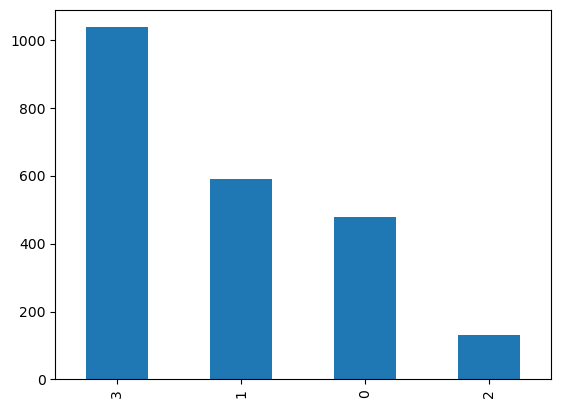

In [212]:
data.Clusters.value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

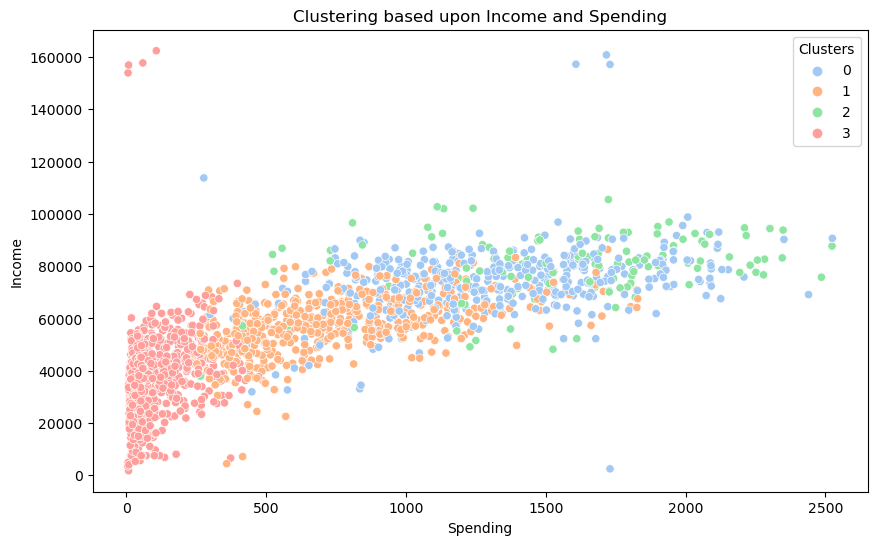

In [213]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.total_spent, y=data.Income, hue=data.Clusters, data=data,palette='pastel')
plt.title('Clustering based upon Income and Spending')
plt.xlabel('Spending')
plt.savefig('Clustering IncSpe.png')
plt.show

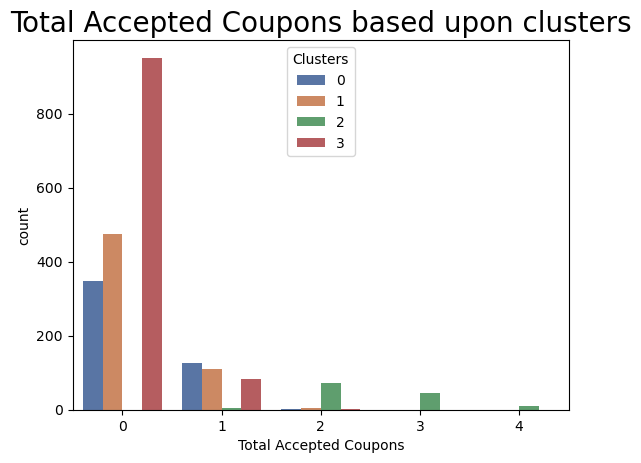

In [214]:
sns.countplot(x=data.total_accepted_coupons, hue=data.Clusters, data=data,palette='deep')
plt.title('Total Accepted Coupons based upon clusters', fontsize=20)
plt.xlabel('Total Accepted Coupons')
plt.savefig('Clusters Coupons.png')
plt.show()

In [215]:
cols=data[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

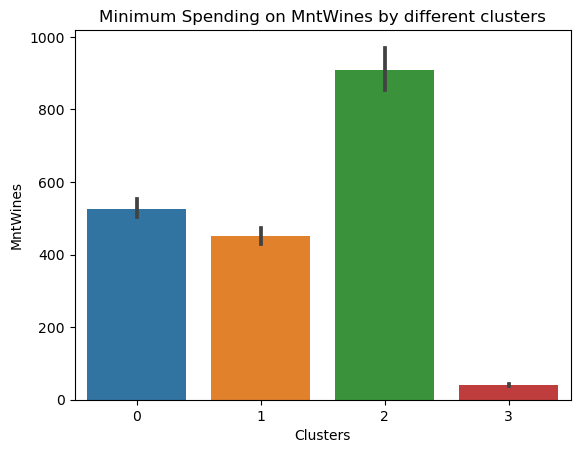

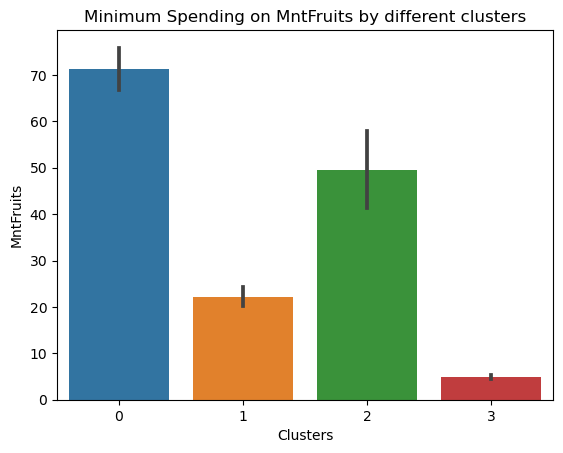

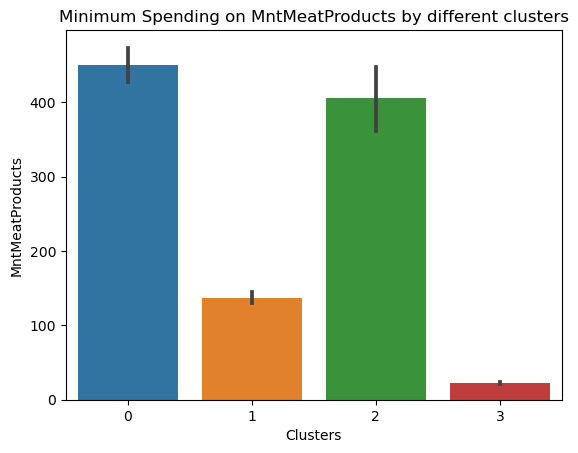

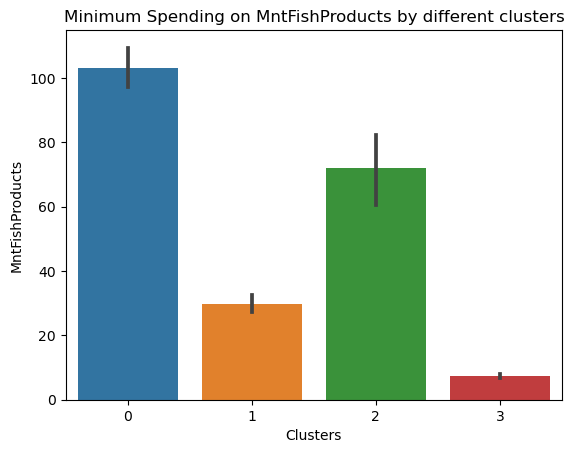

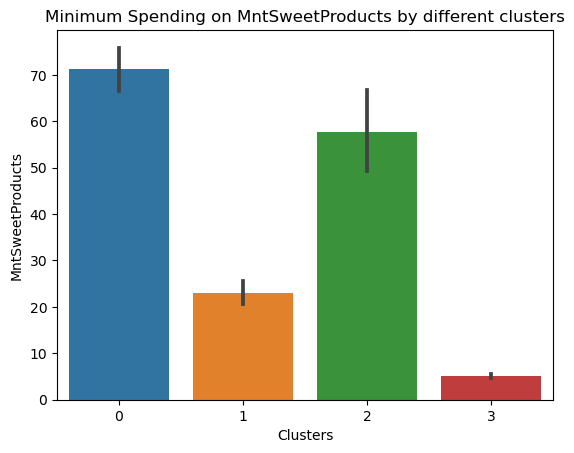

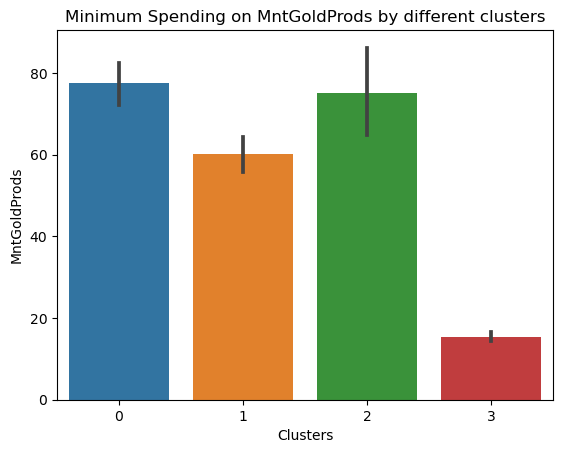

In [216]:
for i in cols:
    plt.subplots()
    sns.barplot(y=data[i], x=data.Clusters, data=data)
    plt.title(f'Minimum Spending on {i} by different clusters')

<AxesSubplot:xlabel='Clusters', ylabel='total_spent'>

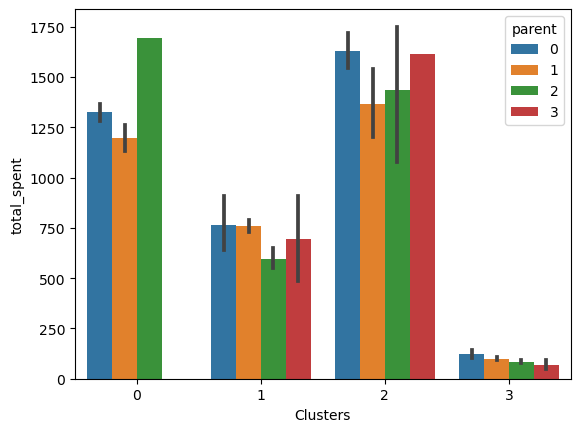

In [217]:
sns.barplot(y=data.total_spent, x=data.Clusters, hue=data.parent, data=data)

In [218]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases', 'Clusters'],
      dtype='object')

<AxesSubplot:xlabel='Clusters', ylabel='number_of_total_purchases'>

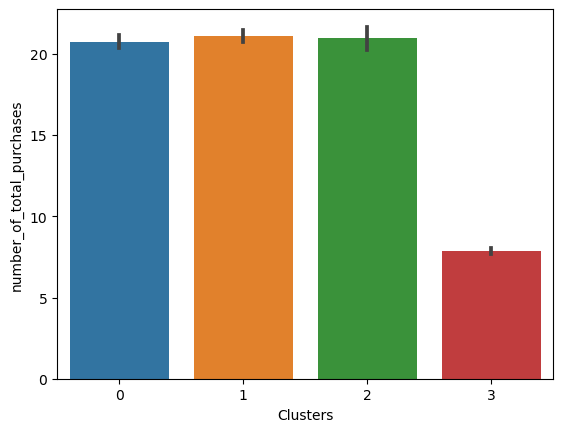

In [219]:
sns.barplot(y=data.number_of_total_purchases, x=data.Clusters, data=data)

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

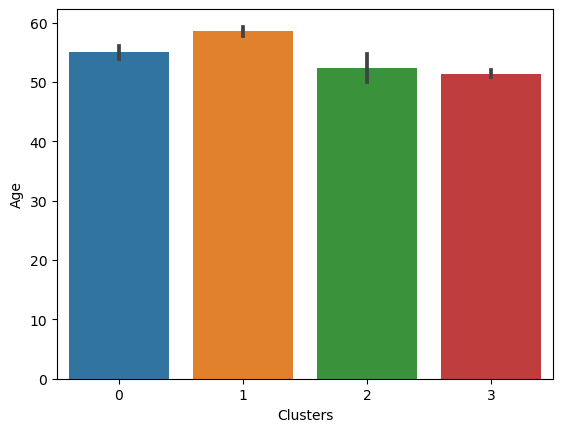

In [220]:
sns.barplot(y=data.Age, x=data.Clusters, data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

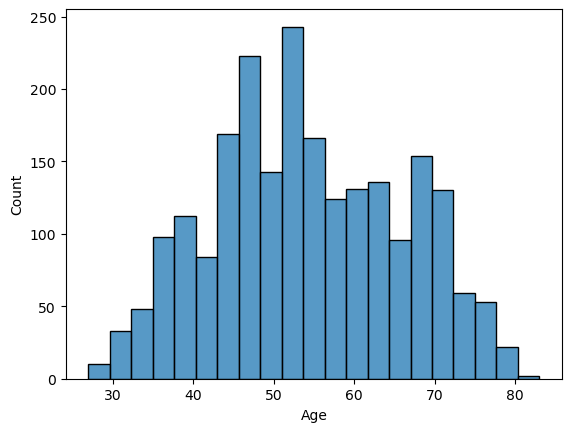

In [221]:
sns.histplot(x=data.Age)

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

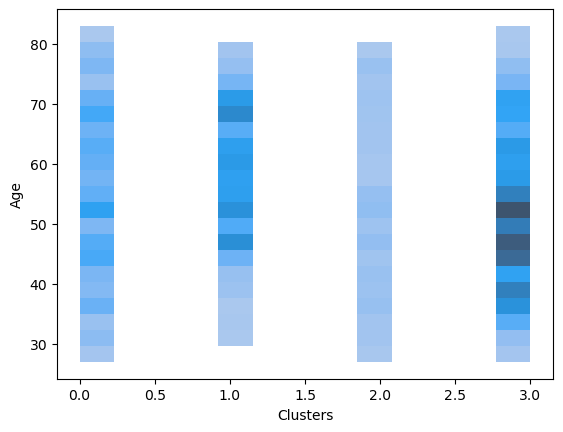

In [222]:
sns.histplot(y=data.Age, x=data.Clusters, data=data,kde=True)

In [223]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases', 'Clusters'],
      dtype='object')

In [224]:
purchases=data.groupby('Clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum()

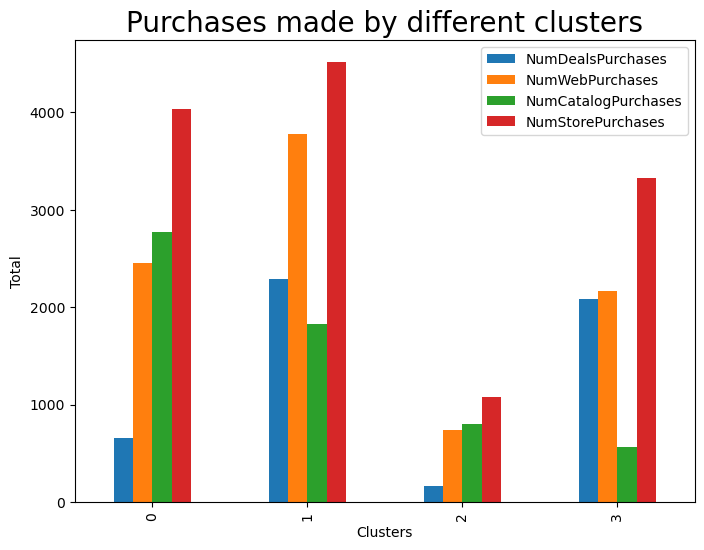

In [225]:
purchases.plot(kind='bar',figsize=(8,6))
plt.title('Purchases made by different clusters', fontsize=20)
plt.ylabel('Total')
plt.savefig('ClustersPurchases.png')
plt.show()

In [226]:
purchases=data.groupby('Clusters')['number_of_total_purchases'].sum()

<AxesSubplot:xlabel='Clusters'>

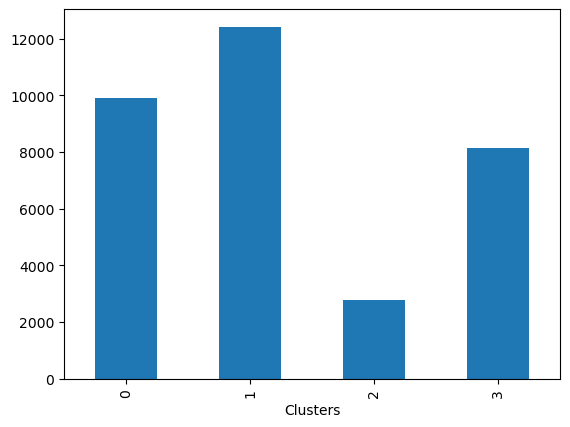

In [227]:
purchases.plot(kind='bar')

<AxesSubplot:xlabel='Marital_Status', ylabel='total_spent'>

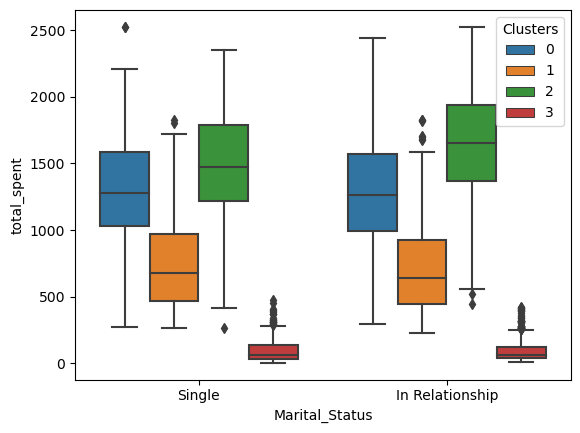

In [228]:
sns.boxplot(x=data.Marital_Status, y=data.total_spent, hue=data.Clusters)

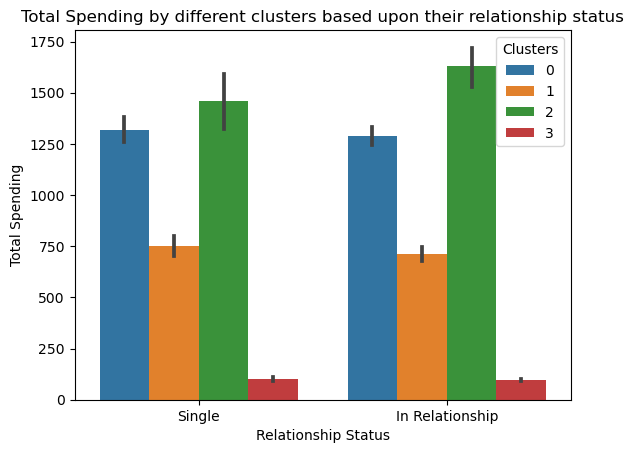

In [229]:
sns.barplot(x=data.Marital_Status, y=data.total_spent, hue=data.Clusters)
plt.title('Total Spending by different clusters based upon their relationship status')
plt.xlabel('Relationship Status')
plt.ylabel('Total Spending')
plt.savefig('ClustersRelationship.png')
plt.show()
           

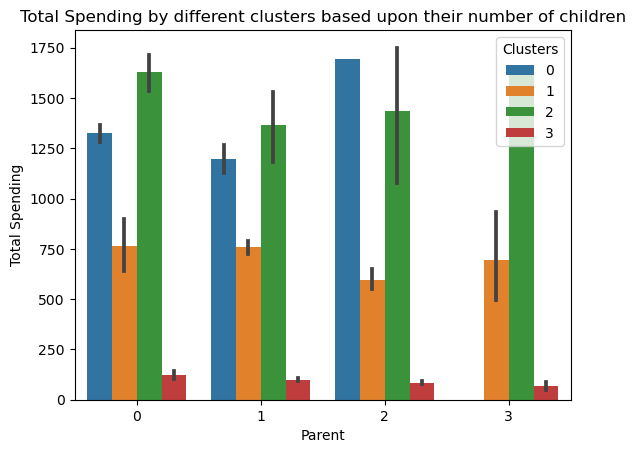

In [230]:
sns.barplot(x=data.parent, y=data.total_spent, hue=data.Clusters)
plt.title('Total Spending by different clusters based upon their number of children')
plt.xlabel('Parent')
plt.ylabel('Total Spending')
plt.savefig('ClustersParents.png')
plt.show()
           

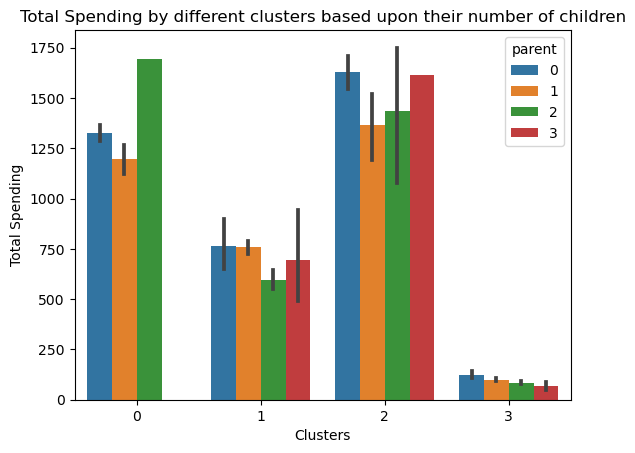

In [231]:
sns.barplot(x=data.Clusters, y=data.total_spent, hue=data.parent)
plt.title('Total Spending by different clusters based upon their number of children')
plt.xlabel('Clusters')
plt.ylabel('Total Spending')
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='number_of_total_purchases'>

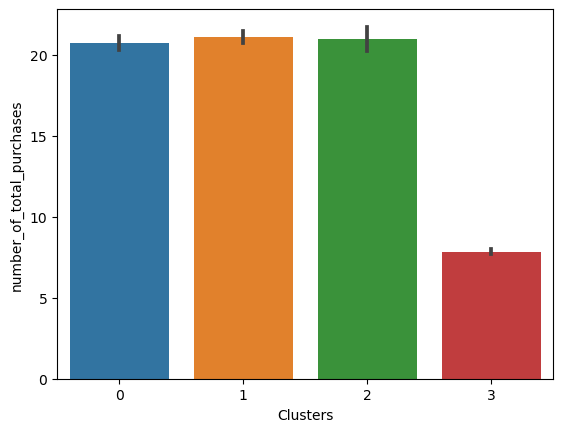

In [232]:
sns.barplot(y=data.number_of_total_purchases,x=data.Clusters)



In [233]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases', 'Clusters'],
      dtype='object')

<AxesSubplot:xlabel='Clusters', ylabel='count'>

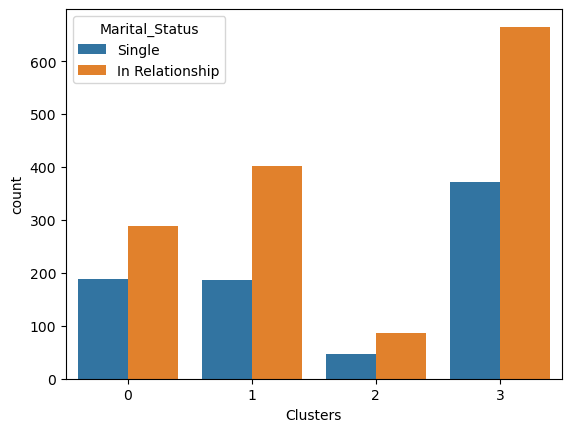

In [234]:
sns.countplot(hue=data.Marital_Status, x=data.Clusters)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

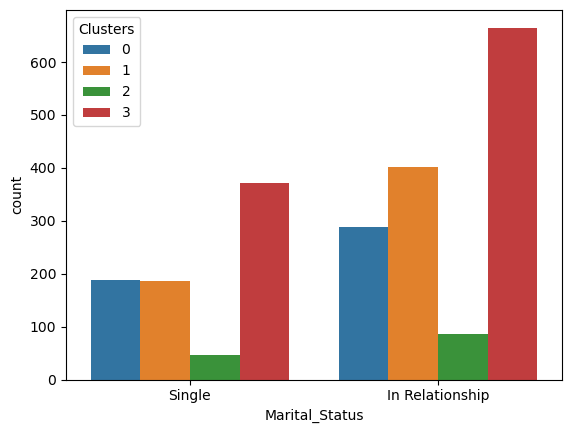

In [235]:
sns.countplot(x=data.Marital_Status, hue=data.Clusters)

<AxesSubplot:xlabel='parent', ylabel='count'>

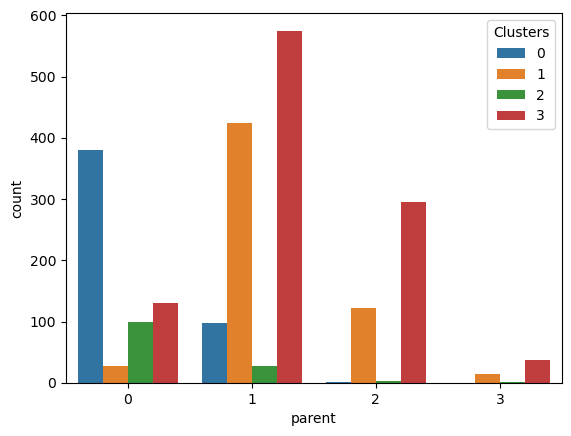

In [236]:
sns.countplot(x=data.parent, hue=data.Clusters)

<AxesSubplot:xlabel='Education', ylabel='count'>

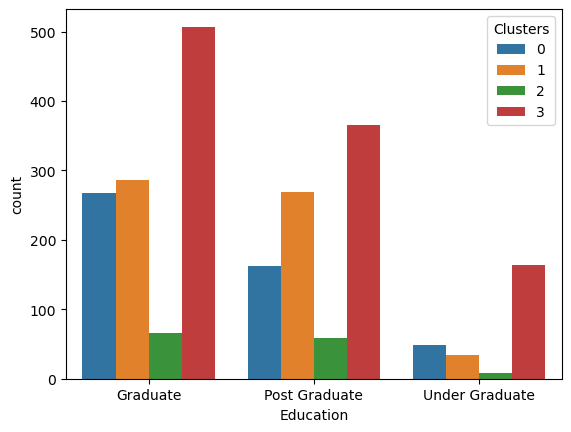

In [237]:
sns.countplot(x=data.Education, hue=data.Clusters)

In [238]:
data['Education'].value_counts()

Graduate          1126
Post Graduate      855
Under Graduate     255
Name: Education, dtype: int64

In [239]:
items=data.groupby('Clusters')[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

<AxesSubplot:xlabel='Clusters'>

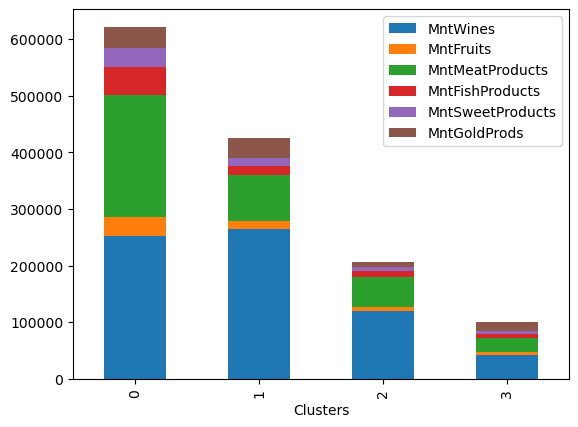

In [240]:
items.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Complain', ylabel='count'>

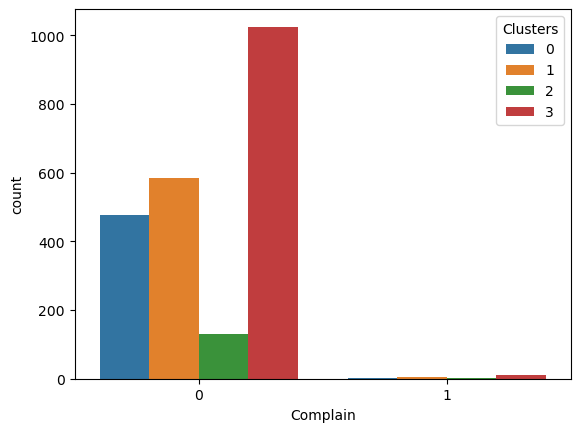

In [241]:
sns.countplot(x=data.Complain, hue=data.Clusters)

## DBSCAN

For DBSCAN we need to find the 2 parameters eps and min points (eps='epsilon'=radius calculated by looking at K Ditsance Graph', min_points= features*2)

In [242]:
data=pd.read_csv('scaled_data.csv')

In [243]:
data

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


In [244]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [245]:
data.isnull().sum()

Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
Age                          0
total_spent                  0
parent                       0
total_accepted_coupons       0
number_of_total_purchases    0
dtype: int64

### K nearest neighbours

In [246]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases', 'Clusters'],
      dtype='object')

In [247]:
feature= [c for c in df.columns if c!='Clusters']

In [248]:
X=df[feature]
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


In [249]:
y=df['Clusters']
y

0       0
1       3
2       0
3       3
4       1
       ..
2231    1
2232    1
2233    0
2234    1
2235    3
Name: Clusters, Length: 2236, dtype: int32

In [250]:
### n_neighbors using hyperparameters tuning

In [251]:
cv_scores=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    scores= cross_val_score(knn,X,y,cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

In [252]:
best_n= np.argmax(cv_scores)+1

In [253]:
best_n

12

In [254]:
from sklearn.neighbors import NearestNeighbors

In [261]:
knn=NearestNeighbors(n_neighbors=12)

In [262]:
model= knn.fit(pca_df)

In [263]:
distances,indices= knn.kneighbors(pca_df)

In [264]:
distances=np.sort(distances,axis=0)

In [265]:
distances=distances[:,1]

Text(0.5, 1.0, 'k Distance Graph')

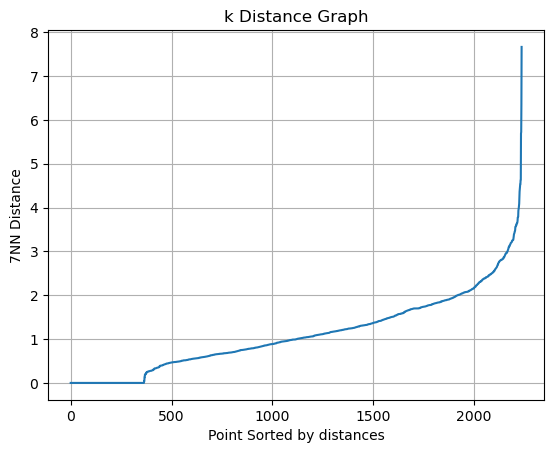

In [266]:
plt.grid()
plt.plot(distances)
plt.xlabel('Point Sorted by distances')
plt.ylabel('7NN Distance')
plt.title('k Distance Graph')

Eps= 0.5 , min_samples= 12*2=24

In [267]:
outlier_percent=[]

for eps in np.linspace(0.001,3,50):
    dbscan=DBSCAN(eps=eps, min_samples=24)
    dbscan.fit(pca_df)
    
    perc_outliers= 100*np.sum(dbscan.labels_ == -1)/ len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Percentage of points considered as outliers')

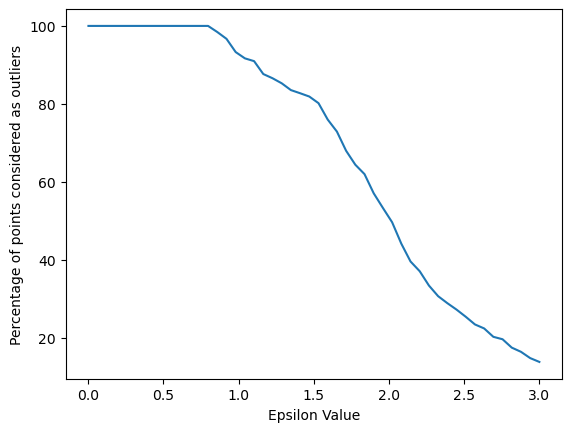

In [268]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent)
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of points considered as outliers')

## DBSCAN implementation

In [269]:
db= DBSCAN(eps=0.5, min_samples=24)

In [270]:
db.fit(pca_df)

DBSCAN(min_samples=24)

In [271]:
df['Db_Clusters']= dbscan.labels_

In [272]:
df.Db_Clusters.value_counts()

 0    1874
-1     309
 1      53
Name: Db_Clusters, dtype: int64

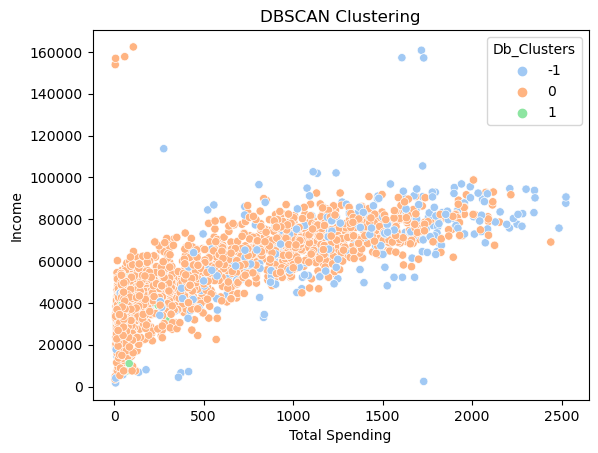

In [293]:
sns.scatterplot(x=data.total_spent, y=data.Income, hue= df.Db_Clusters,palette='pastel')
plt.title('DBSCAN Clustering')
plt.xlabel('Total Spending')
plt.savefig('DBSCAN.png')
plt.show()

In [294]:
## Without eps and min_samples

In [295]:
db= DBSCAN()

In [296]:
db.fit(pca_df)

DBSCAN()

In [297]:
df['Db_Clusters']= dbscan.labels_

In [298]:
df.Db_Clusters.value_counts()

 0    1874
-1     309
 1      53
Name: Db_Clusters, dtype: int64

Same result as above therfore, hyperparameter should be done properly for next steps.